# Connecticut Dickey-Fuller Tests & Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
topzip = pd.read_csv('topzip_timeseries.csv')
topzip.head()

,time,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,AveragePrice,ROI,value
0,1996-04-01,60545,7030,Hoboken,NJ,New York,Hudson,58,957777.358491,5.148210,301600.0
1,1996-04-01,62022,11211,New York,NY,New York,Kings,118,595167.169811,11.189940,133200.0
2,1996-04-01,60639,7302,Jersey City,NJ,New York,Hudson,192,596591.320755,9.403061,137200.0
3,1996-04-01,62027,11216,New York,NY,New York,Kings,476,572171.698113,9.942505,146100.0
4,1996-04-01,62033,11222,New York,NY,New York,Kings,1156,640047.547170,10.535523,149200.0


In [3]:
topzip['time'] = pd.to_datetime(topzip['time'])
topzip.set_index('time', inplace=True)

In [12]:
topzip.drop(columns=['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'AveragePrice', 'ROI'], inplace=True)

In [36]:
state_zips = [6820, 6068, 6793]

state = topzip[topzip['Zipcode'].isin(state_zips)]
state.head()

,Zipcode,value
time,,
1996-04-01,6820,552100.0
1996-04-01,6068,191600.0
1996-04-01,6793,280800.0
1996-05-01,6820,553400.0
1996-05-01,6068,191900.0


### First Zipcode

In [37]:
first_zip = state[state['Zipcode'] == state_zips[0]]
first_zip.drop(columns=['Zipcode'], inplace=True)
first_zip.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,value
time,
1996-04-01,552100.0
1996-05-01,553400.0
1996-06-01,554800.0
1996-07-01,556000.0
1996-08-01,557000.0


In [38]:
roll_mean = first_zip.rolling(window=12, center=False).mean()
roll_std = first_zip.rolling(window=12, center=False).std()

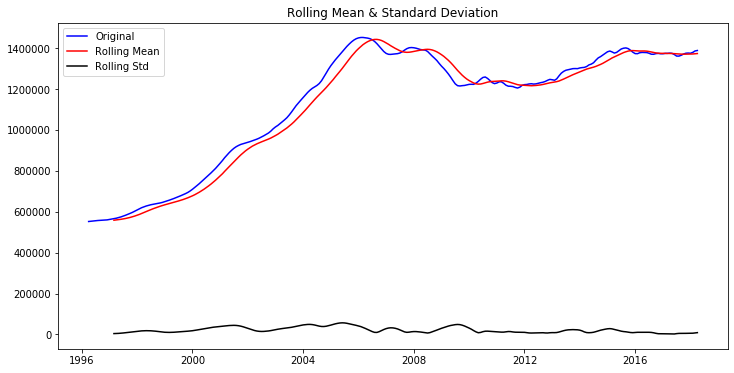

In [39]:
fig = plt.figure(figsize=(12,6))
plt.plot(first_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(first_zip['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.21629346214937967
Fail to reject the null hypothesis. Data is not stationary.



In [41]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.172724
p-value                          0.216293
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [42]:
one_diff_first = first_zip.diff().dropna()

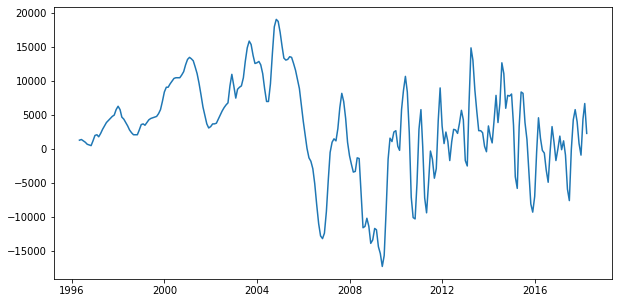

In [43]:
plt.figure(figsize=(10,5))
plt.plot(one_diff_first);

In [44]:
dftest = adfuller(one_diff_first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.16860903977569947
Fail to reject the null hypothesis. Data is not stationary.



In [45]:
two_diff_first = one_diff_first.diff().dropna()

In [46]:
dftest = adfuller(two_diff_first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 6.683827826659577e-07
Reject the null hypothesis. Data is stationary.



In [47]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -5.728519e+00
p-value                        6.683828e-07
#Lags Used                     1.600000e+01
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


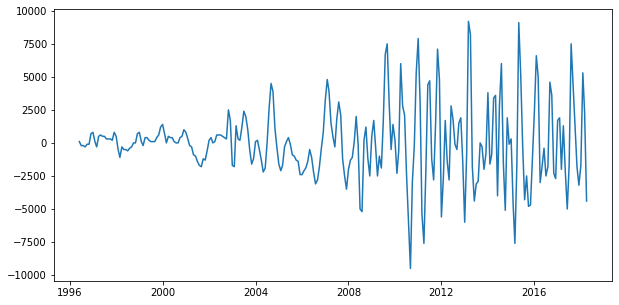

In [48]:
plt.figure(figsize=(10,5))
plt.plot(two_diff_first);

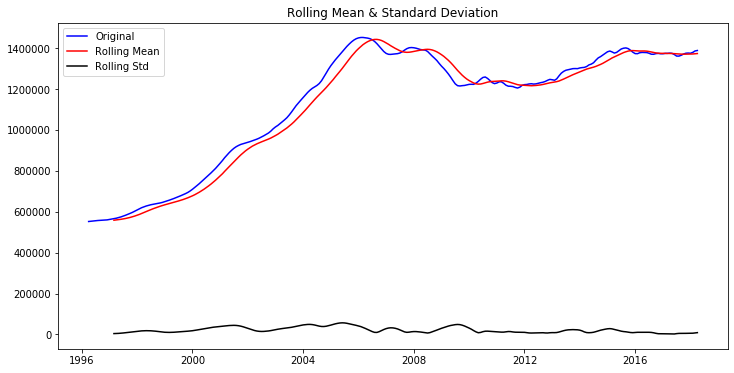

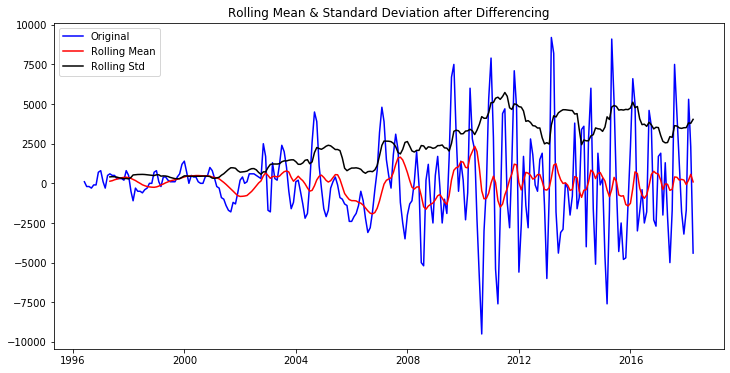

In [49]:
fig = plt.figure(figsize=(12,6))
plt.plot(first_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

diff_roll_mean = two_diff_first.rolling(window=12, center=False).mean()
diff_roll_std = two_diff_first.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(two_diff_first, color='blue',label='Original')
plt.plot(diff_roll_mean, color='red', label='Rolling Mean')
plt.plot(diff_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after Differencing')
plt.show()

### Second Zipcode

In [50]:
second_zip = state[state['Zipcode'] == state_zips[1]]
second_zip.drop(columns=['Zipcode'], inplace=True)
second_zip.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,value
time,
1996-04-01,191600.0
1996-05-01,191900.0
1996-06-01,192200.0
1996-07-01,192300.0
1996-08-01,192600.0


In [51]:
roll_mean = second_zip.rolling(window=12, center=False).mean()
roll_std = second_zip.rolling(window=12, center=False).std()

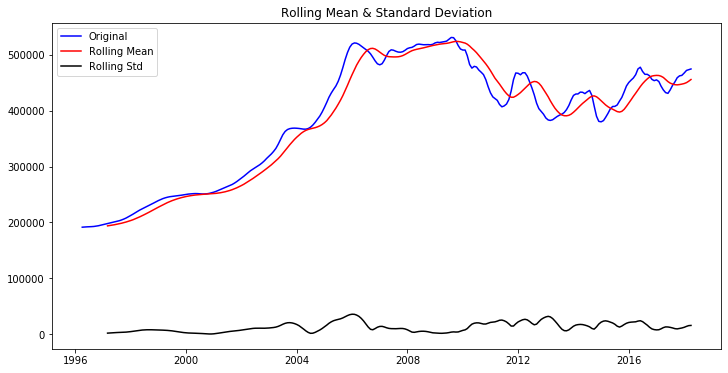

In [53]:
fig = plt.figure(figsize=(12,6))
plt.plot(second_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [54]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(second_zip['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.3789496728748944
Fail to reject the null hypothesis. Data is not stationary.



In [55]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -1.803048
p-value                          0.378950
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [56]:
one_diff_second = second_zip.diff().dropna()

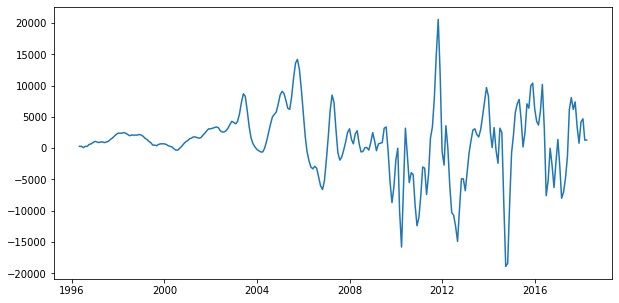

In [57]:
plt.figure(figsize=(10,5))
plt.plot(one_diff_second);

In [58]:
dftest = adfuller(one_diff_second['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.002667352703430322
Reject the null hypothesis. Data is stationary.



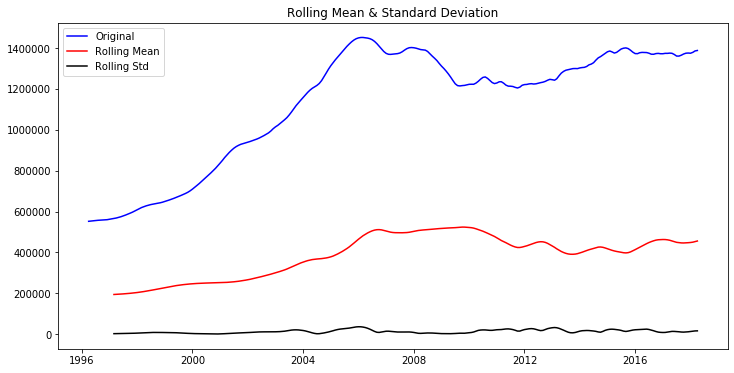

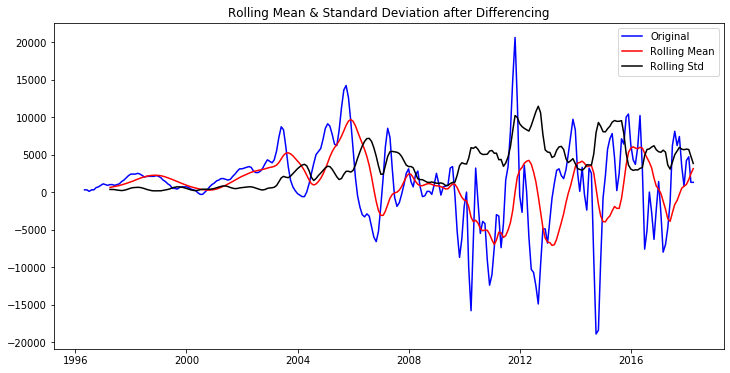

In [59]:
fig = plt.figure(figsize=(12,6))
plt.plot(first_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

diff_roll_mean = one_diff_second.rolling(window=12, center=False).mean()
diff_roll_std = one_diff_second.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(one_diff_second, color='blue',label='Original')
plt.plot(diff_roll_mean, color='red', label='Rolling Mean')
plt.plot(diff_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after Differencing')
plt.show()

### Third Zipcode

In [60]:
third_zip = state[state['Zipcode'] == state_zips[2]]
third_zip.drop(columns=['Zipcode'], inplace=True)
third_zip.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,value
time,
1996-04-01,280800.0
1996-05-01,282500.0
1996-06-01,284300.0
1996-07-01,286200.0
1996-08-01,288000.0


In [61]:
roll_mean = third_zip.rolling(window=12, center=False).mean()
roll_std = third_zip.rolling(window=12, center=False).std()

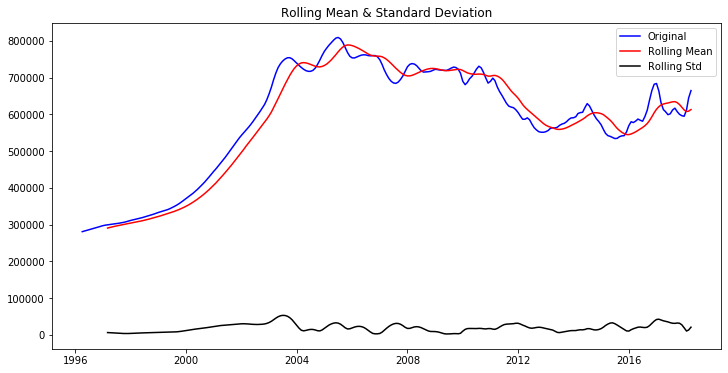

In [62]:
fig = plt.figure(figsize=(12,6))
plt.plot(third_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [63]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(third_zip['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.21298196794972774
Fail to reject the null hypothesis. Data is not stationary.



In [64]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -2.181625
p-value                          0.212982
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [65]:
one_diff_third = third_zip.diff().dropna()

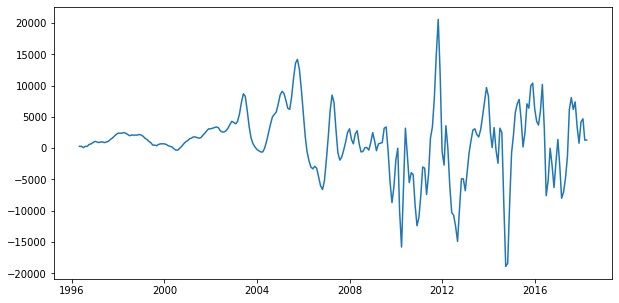

In [66]:
plt.figure(figsize=(10,5))
plt.plot(one_diff_second);

In [68]:
dftest = adfuller(one_diff_third['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 0.05830079208558181
Fail to reject the null hypothesis. Data is not stationary.



In [69]:
two_diff_third = one_diff_third.diff().dropna()

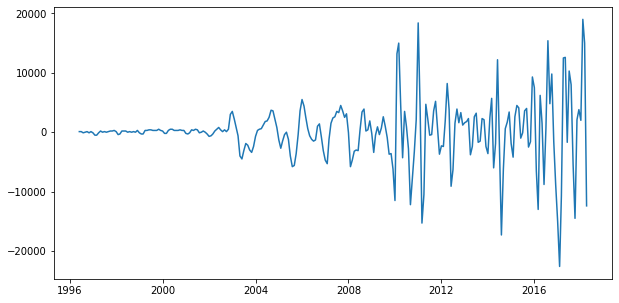

In [72]:
plt.figure(figsize=(10,5))
plt.plot(two_diff_third);

In [70]:
dftest = adfuller(two_diff_third['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')

p-value: 8.576750370540442e-09
Reject the null hypothesis. Data is stationary.



In [71]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -6.556789e+00
p-value                        8.576750e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


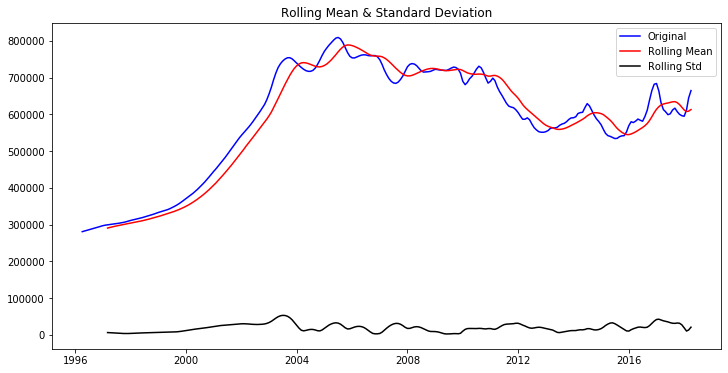

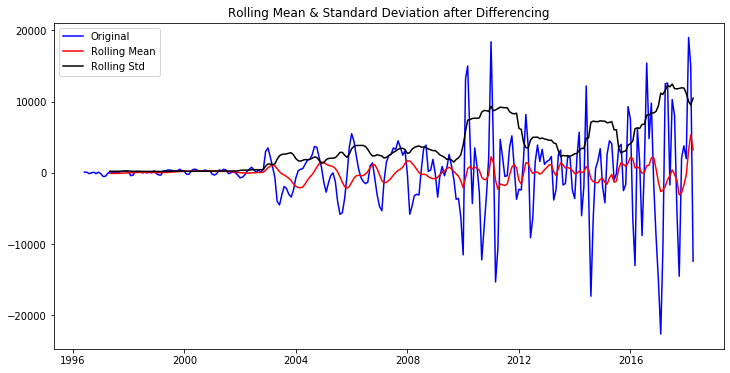

In [73]:
fig = plt.figure(figsize=(12,6))
plt.plot(third_zip, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

diff_roll_mean = two_diff_third.rolling(window=12, center=False).mean()
diff_roll_std = two_diff_third.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(two_diff_third, color='blue',label='Original')
plt.plot(diff_roll_mean, color='red', label='Rolling Mean')
plt.plot(diff_roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation after Differencing')
plt.show()